In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
import os
import glob
import matplotlib.image as mpimg
from pathlib import Path
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define directories
original_data_dir = 'compdata_180_1000/Datasets/Carian'  # Path to your original data directory
base_dir = 'Carian_180_1000'  # Base directory to save the split data

# Create base directory if it does not exist
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Split dataset into training-validation and testing
trainval_dir = os.path.join(base_dir, 'trainval')
test_dir = os.path.join(base_dir, 'test')
os.mkdir(trainval_dir)
os.mkdir(test_dir)

# Move data to trainval and test directories
for class_name in os.listdir(original_data_dir):
    class_dir = os.path.join(original_data_dir, class_name)
    trainval_class_dir = os.path.join(trainval_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.mkdir(trainval_class_dir)
    os.mkdir(test_class_dir)
    filenames = os.listdir(class_dir)
    trainval_filenames, test_filenames = train_test_split(filenames, test_size=0.2, random_state=42)
    for filename in trainval_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(trainval_class_dir, filename)
        shutil.copyfile(src, dst)
    for filename in test_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(test_class_dir, filename)
        shutil.copyfile(src, dst)

# Split training-validation set into training and validation
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
os.mkdir(train_dir)
os.mkdir(val_dir)

for class_name in os.listdir(trainval_dir):
    class_dir = os.path.join(trainval_dir, class_name)
    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    os.mkdir(train_class_dir)
    os.mkdir(val_class_dir)
    filenames = os.listdir(class_dir)
    train_filenames, val_filenames = train_test_split(filenames, test_size=0.25, random_state=42)  # 60% train, 20% validation
    for filename in train_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(train_class_dir, filename)
        shutil.copyfile(src, dst)
    for filename in val_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(val_class_dir, filename)
        shutil.copyfile(src, dst)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 64
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Load and split data from the same directory
train_generator = datagen.flow_from_directory(
    'Carian_180_1000/train',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify 'training' subset for training data
)

validation_generator = datagen.flow_from_directory(
    'Carian_180_1000/val',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' )
test_generator = datagen.flow_from_directory(
    'Carian_180_1000/test',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify 'validation' subset for testing data
)

Found 3792 images belonging to 44 classes.
Found 308 images belonging to 44 classes.
Found 308 images belonging to 44 classes.


In [12]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64, 3),),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu',),
    Dense(256, activation='relu'),
    Dense(44, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/100


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.0359 - loss: 3.7341 - val_accuracy: 0.2383 - val_loss: 2.5660
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2344 - loss: 2.4259 - val_accuracy: 0.3269 - val_loss: 2.4901
Epoch 3/100


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.4259 - loss: 1.8567 - val_accuracy: 0.6133 - val_loss: 1.0742
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8750 - loss: 0.6379 - val_accuracy: 0.6154 - val_loss: 1.2695
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.7803 - loss: 0.6547 - val_accuracy: 0.8164 - val_loss: 0.5424
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9062 - loss: 0.3072 - val_accuracy: 0.8654 - val_loss: 0.5408
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9138 - loss: 0.2692 - val_accuracy: 0.7969 - val_loss: 0.5565
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.1699 - val_accuracy: 0.9038 - val_loss: 0.3493
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9392 - loss: 0.1756 - val_accuracy: 0.9336 - val_loss: 0.2556
Epoch 10/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.1731 - val_accuracy: 0.9038 - val_loss

59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9953 - loss: 0.0153 - val_accuracy: 0.9648 - val_loss: 0.1634
Epoch 54/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.2764 - val_accuracy: 0.9808 - val_loss: 0.0746
Epoch 55/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9901 - loss: 0.0361 - val_accuracy: 0.9219 - val_loss: 0.2165
Epoch 56/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.9231 - val_loss: 0.2405
Epoch 57/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9945 - loss: 0.0261 - val_accuracy: 0.9492 - val_loss: 0.1676
Epoch 58/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.9615 - val_loss: 0.0872
Epoch 59/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9764 - loss: 0.0970 - val_accuracy: 0.9609 - val_loss: 0.1025
Epoch 60/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0091 - val_accuracy: 0.9808 - va

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


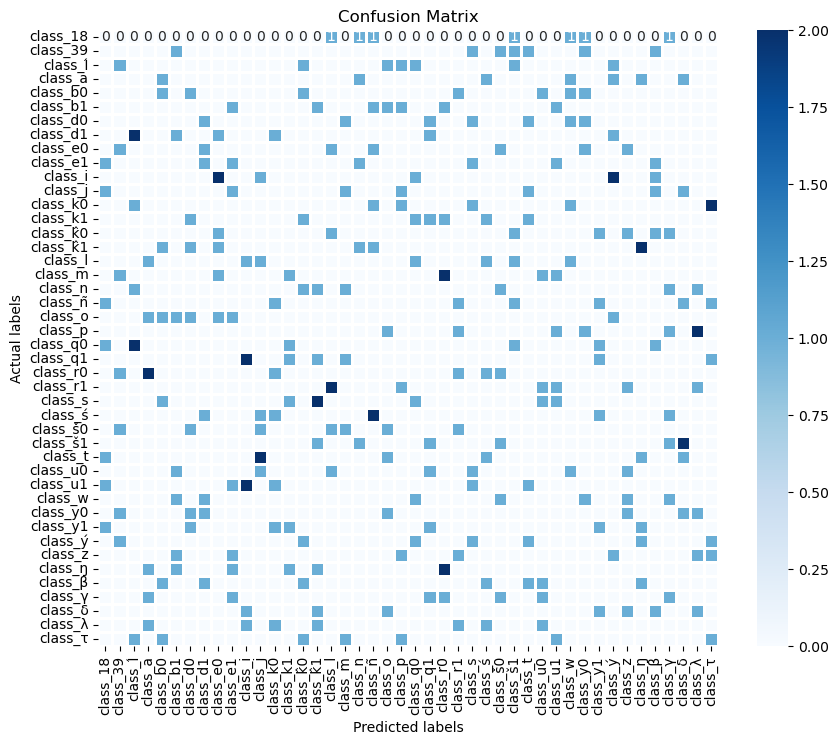

In [13]:
import seaborn as sns
# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

y_pred_labels = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get actual class names
actual_class_names = [class_labels[i] for i in y_true]

# Create confusion matrix
cm = confusion_matrix(actual_class_names, [class_labels[i] for i in y_pred_labels])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', linewidths=1, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
model.save("minst.h5")